In [6]:
%load_ext autoreload
%autoreload 1

import os
import subprocess
import sys
import warnings

warnings.simplefilter("ignore", FutureWarning)

%aimport cnv_inference_config
project_config = cnv_inference_config
os.chdir(project_config.MB_ROOT)

from collections import defaultdict, OrderedDict
import multiprocessing as mp
import numpy as np
import pandas as pd
from tqdm import tqdm, tqdm_notebook

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

%aimport ase_matrix
%aimport plotlib
%aimport toolkit
%aimport util
%aimport qc
%aimport workspace_manager

workspace = workspace_manager.WorkspaceManager(
    task_name="counts_to_ase",
    experiment_info={"data" : "scDNA"},
    verbose=True
)
workspace.load_workspace()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
clustering_name = 'evo_dist_9'
requirements = ["gene_counts"]

data = {
    dtype : 
    util.pickle_load(workspace.tmp_data[dtype])
    for dtype in tqdm_notebook(
        requirements,
        "loading datasets into RAM"
    )
}
data_name = workspace.experiment_info['data']
sample_name = workspace.experiment_info['sample']
print(f"Currently working on {data_name}, {sample_name}")

data[f"{clustering_name}_clustering"] = util.pickle_load(
    f"{workspace.dir}"
    f"/{clustering_name}_clustering.pkl"
)
data[f"{clustering_name}_clustering"].head()


Currently working on scDNA, first_sample


,BARCODE,CELL_ID,LABEL
0,AAACCTGTCTTGCGAA-1,1,9
1,AACTCCCAGGGATTCG-1,10,8
2,CACCTTGAGAAGGACA-1,100,6
3,CACCTTGAGGTAAACT-1,101,2
4,CAGAGAGGTTCCCACT-1,104,5


In [27]:
data[f'{clustering_name}_gene_counts'] =\
    toolkit.aggregate_by_barcode_groups(
        data["gene_counts"], 
        data[f"{clustering_name}_clustering"]
    )
util.pickle_dump(
    data[f'{clustering_name}_gene_counts'], 
    f"{workspace.tmp_dir}"
    "/clustered_gene_counts.pkl"
)
workspace.add_entry(
    "clustered_gene_counts",
    f'{clustering_name}_gene_counts.pkl'
)
data[f'{clustering_name}_gene_counts'].head()

,1_ad,1_dp,2_ad,2_dp,3_ad,3_dp,4_ad,4_dp,5_ad,5_dp,6_ad,6_dp,7_ad,7_dp,8_ad,8_dp,9_ad,9_dp
0,14.0,32.0,16.0,25.0,12.0,26.0,18.0,31.0,17.0,19.0,27.0,39.0,14.0,19.0,3.0,9.0,8.0,12.0
1,3.0,9.0,1.0,2.0,2.0,8.0,NaN,NaN,5.0,8.0,2.0,11.0,2.0,6.0,1.0,5.0,2.0,6.0
2,6.0,12.0,3.0,8.0,2.0,7.0,5.0,16.0,3.0,3.0,8.0,11.0,NaN,NaN,1.0,7.0,1.0,3.0
3,53.0,107.0,56.0,100.0,27.0,51.0,32.0,68.0,52.0,98.0,35.0,68.0,29.0,56.0,20.0,35.0,20.0,55.0
4,9.0,9.0,8.0,8.0,4.0,6.0,4.0,9.0,6.0,7.0,9.0,11.0,1.0,1.0,4.0,4.0,4.0,4.0


In [28]:
data[f'{clustering_name}_ase'] = ase_matrix.compute_ase(
    data[f'{clustering_name}_gene_counts'], 
    toolkit.extract_cluster_labels(data[f'{clustering_name}_clustering'])
)
util.pickle_dump(
    data[f'{clustering_name}_ase'], 
    f"{workspace.tmp_dir}"
    f"/{clustering_name}_clustered_ase.pkl"
)

CPU times: user 43.5 s, sys: 1.23 s, total: 44.8 s
Wall time: 44.6 s


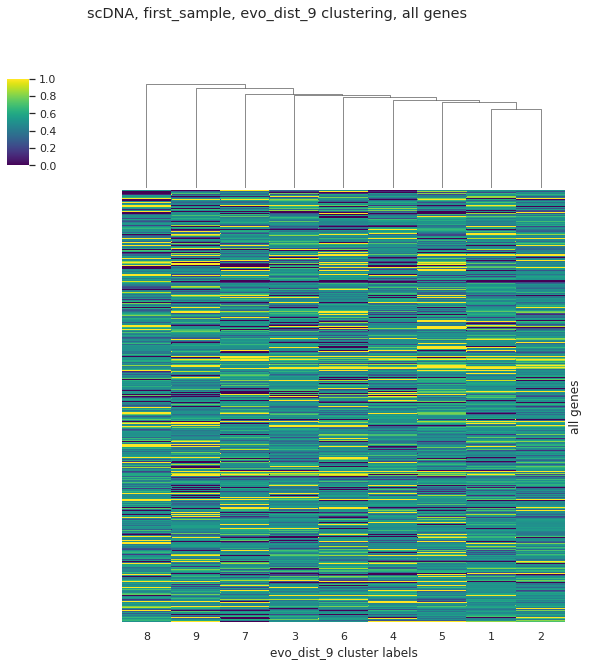

In [31]:
%%time
ase_matrix.plot_ase(
    data[f'{clustering_name}_ase'],
    title=f"{data_name}, {sample_name}, {clustering_name}"
    f" clustering, all genes",
    xlabel=f"{clustering_name} cluster labels",
    ylabel="all genes",
    row_cluster=False,
    outfile=f"{workspace.img_dir}/{clustering_name}_ase.pdf"
)

In [30]:
workspace.status()
workspace.verify()
workspace.push()

Staged for commit: 
	-clustered_gene_counts : evo_dist_9_gene_counts.pkl


/icgc/dkfzlsdf/analysis/B260/users/v390v/cnv_inference/data/tmp/counts_to_ase/first_sample/scDNA/clustered_gene_counts.pkl —> /icgc/dkfzlsdf/analysis/B260/users/v390v/cnv_inference/data/processed/first_sample/scDNA/evo_dist_9_gene_counts.pkl
